In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from keras.preprocessing.image import load_img




In [22]:

# Define train and test image paths
train_files_path = "C:/Users/cengh/Desktop/repos/airplanedataset/Train/"
test_files_path = "C:/Users/cengh/Desktop/repos/airplanedataset/Test/"

# Concatenate the file path with the appropriate separator
img_path = test_files_path + "B-52/3-1.jpg"

# Load the image
img = load_img(img_path)


In [19]:
# What is the size?
print(img_to_array(img).shape)

(230, 266, 3)


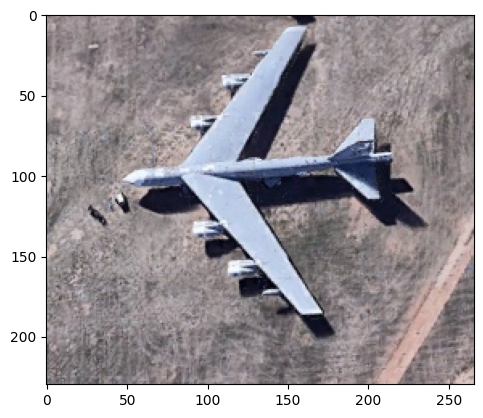

In [20]:
# Let's see this airplane, check if we can see it correctly?
plt.imshow(img)
plt.show()

In [23]:
train_data = ImageDataGenerator().flow_from

AttributeError: 'ImageDataGenerator' object has no attribute 'flow_from'

In [ ]:
print(img.ndim)

3


In [ ]:
# We have to add an extra dimension to our array so we will reshape it.. 
img = img.reshape(-1,224,224,3)   # with reshape(-1,..) I'm adding 1 extra dimension..
                                  # I do this because my model requires 4 dim array!

In [ ]:
# Let's look it's shape..
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [ ]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input
# VGG16 model requires it..
img = preprocess_input(img)   

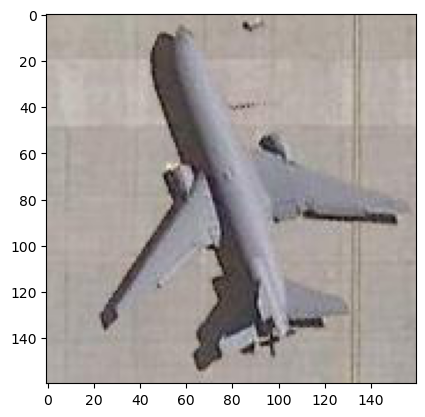

In [ ]:
# Let's see the aircraft..
img_for_display = load_img("f22.jpg")
plt.imshow(img_for_display)
plt.show()

### Let's make a prediction...

In [ ]:
preds = model.predict(img)


In [ ]:
# Let's see contents of prediction array.. 
preds

array([[3.4019530e-03, 3.6386911e-02, 4.2729769e-02, 5.9536577e-04,
        9.1688597e-01]], dtype=float32)

These are the possibilities of each output (one-hot encoding)

Please remember the concept of Softmax:

For example, three class labels will be integer encoded as 0, 1, and 2. Then encoded to vectors as follows:

Class 0: [1, 0, 0]
Class 1: [0, 1, 0]
Class 2: [0, 0, 1]
This is called a one-hot encoding.

In our case:
A-10  Thunderbolt: [1,0,0,0,0]
Boeing B-52: [0,1,0,0,0]
.... 
like this..

For example, if the integer encoded class 1 was expected for example, the target vector would be:
[0, 1, 0]

The softmax output might look as follows, which puts the most weight on class 1 and less weight on the other classes.

For example in 3 output example above if we would have a softmax output like this: 
[0.09003057 0.67524096 0.23472847]

Then we can say the highest probability outcome is  0.67524096 which is Class 1.
I can find the index simply using numpy's argmax funxtion:

class integer = argmax([0.09003057 0.67524096 0.23472847])

In [ ]:
image_classes = ["A-10 Thunderbolt","Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]

result = np.argmax(preds[0])
print(image_classes[result]) 

KC-10 Extender


In [ ]:
print(img_to_array(img).shape)